# Prostate cancer prediction using machine learning


### Importing libraries and loading the dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('Prostate_Cancer.csv')
df.drop(columns='id', inplace=True)
df.columns = df.columns.str.capitalize()
df.columns = df.columns.str.replace('_', ' ').str.title().str.replace(' ', '_')
df.head()

,Diagnosis_Result,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Symmetry,Fractal_Dimension
0,M,23,12,151,954,0.143,0.278,0.242,0.079
1,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,M,14,16,78,386,0.070,0.284,0.260,0.097
4,M,9,19,135,1297,0.141,0.133,0.181,0.059


### Dataset Overview

In [12]:
df.shape

(100, 9)

In [13]:
df.isnull().sum()

Diagnosis_Result     0
Radius               0
Texture              0
Perimeter            0
Area                 0
Smoothness           0
Compactness          0
Symmetry             0
Fractal_Dimension    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Diagnosis_Result   100 non-null    object 
 1   Radius             100 non-null    int64  
 2   Texture            100 non-null    int64  
 3   Perimeter          100 non-null    int64  
 4   Area               100 non-null    int64  
 5   Smoothness         100 non-null    float64
 6   Compactness        100 non-null    float64
 7   Symmetry           100 non-null    float64
 8   Fractal_Dimension  100 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 7.2+ KB


In [15]:
df.describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Symmetry,Fractal_Dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


### Converting the Diagnosis_Result column from an object to a numerical column
Diagnosis_Result is the most important column for us. Because we will classify the data based on this column.

In [16]:
df['Diagnosis_Result'].value_counts()

Diagnosis_Result
M    62
B    38
Name: count, dtype: int64

In [17]:
df['Diagnosis_Result'] = df['Diagnosis_Result'].map({'M': 1, 'B': 0})
df['Diagnosis_Result'].value_counts()

Diagnosis_Result
1    62
0    38
Name: count, dtype: int64

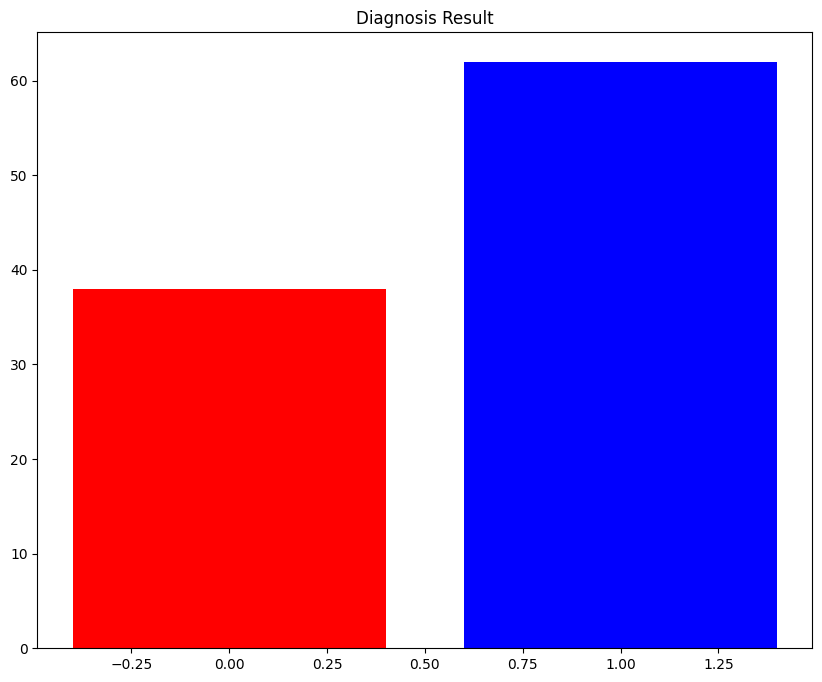

In [21]:
plt.figure(figsize=(10,8))

value_counts = df['Diagnosis_Result'].value_counts()

# value_counts.index: This provides the x-axis values for the bars, which are the unique values in the 'Diagnosis_Result' column.
plt.bar(value_counts.index, value_counts, color=['b', 'r'])
plt.title('Diagnosis Result')
plt.show()

In [22]:
x = df.drop(columns='Diagnosis_Result')
y = df['Diagnosis_Result'].values

scaler = MinMaxScaler(feature_range=(0,1))

X = scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

method_names=[]
method_scores=[]

In [23]:
model = Sequential()
model.add(Dense(32,activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2465 (9.63 KB)
Trainable params: 2465 (9.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 120, validation_data=(X_test,y_test))

Epoch 1/120
3/3 [==============================] - 1s 109ms/step - loss: 0.6888 - accuracy: 0.5875 - val_loss: 0.6234 - val_accuracy: 0.8000
Epoch 2/120
3/3 [==============================] - 0s 17ms/step - loss: 0.6768 - accuracy: 0.5750 - val_loss: 0.6002 - val_accuracy: 0.8000
Epoch 3/120
3/3 [==============================] - 0s 21ms/step - loss: 0.6664 - accuracy: 0.5750 - val_loss: 0.5827 - val_accuracy: 0.8000
Epoch 4/120
3/3 [==============================] - 0s 14ms/step - loss: 0.6577 - accuracy: 0.5750 - val_loss: 0.5688 - val_accuracy: 0.8000
Epoch 5/120
3/3 [==============================] - 0s 16ms/step - loss: 0.6503 - accuracy: 0.5750 - val_loss: 0.5566 - val_accuracy: 0.8000
Epoch 6/120
3/3 [==============================] - 0s 15ms/step - loss: 0.6448 - accuracy: 0.5750 - val_loss: 0.5466 - val_accuracy: 0.8000
Epoch 7/120
3/3 [==============================] - 0s 21ms/step - loss: 0.6370 - accuracy: 0.5750 - val_loss: 0.5430 - val_accuracy: 0.8000
Epoch 8/120
3/3 [==

In [25]:
method_names.append("ANN")
method_scores.append(0.851)

In [26]:
trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
testX = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# Print and check shapes
print("Shape of trainX is {}".format(trainX.shape))
print("Shape of testX is {}".format(testX.shape))

Shape of trainX is (80, 8, 1)
Shape of testX is (20, 8, 1)


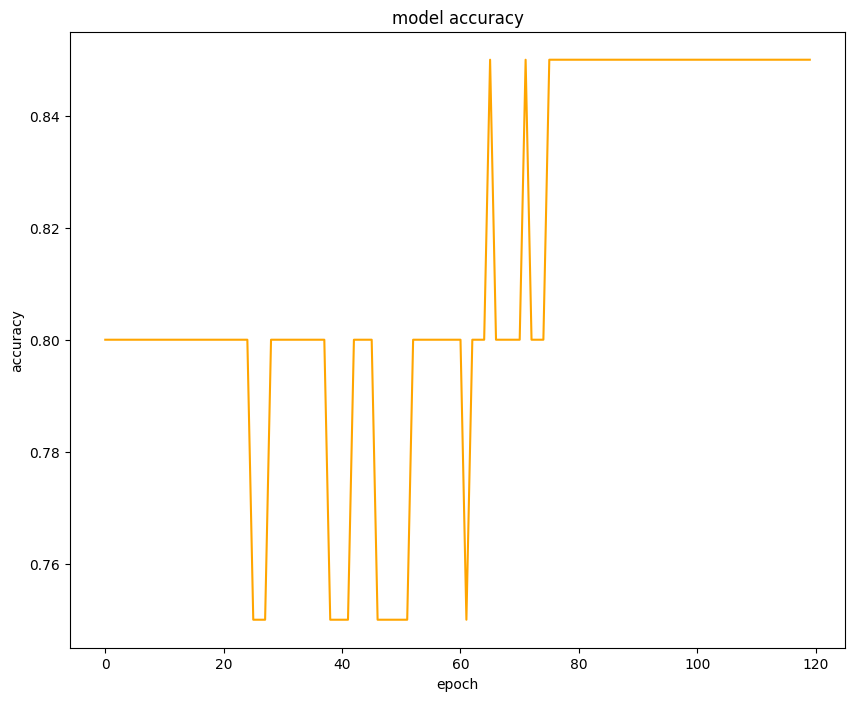

In [27]:
plt.figure(figsize=(10,8))
#plt.plot(history.history[''])
plt.plot(history.history['val_accuracy'],color='orange')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

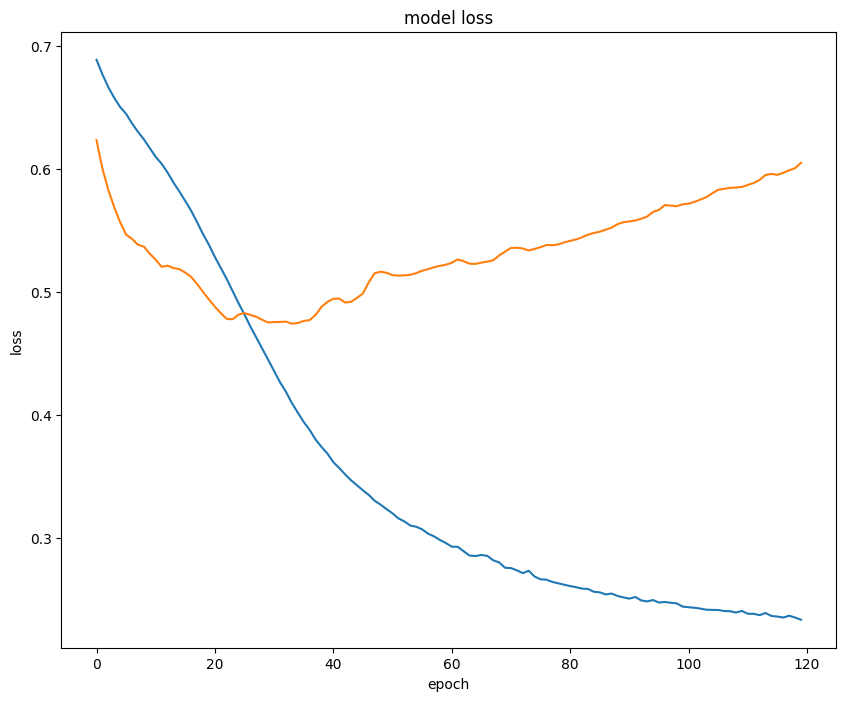

In [28]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [35]:
y_pred_prob = model.predict(X_test)

# Apply a threshold (e.g., 0.5) to convert probabilities to binary predictions
threshold = 0.5
y_pred = (y_pred_prob > threshold).astype(int)
y_pred

1/1 [==============================] - 0s 28ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [36]:
y_test.shape

(20,)

In [37]:
y_pred = np.squeeze(y_pred)
y_pred.shape


(20,)

In [38]:
print('Test Accuracy : ',accuracy_score(y_test, y_pred))

Test Accuracy :  0.85


In [39]:
model.save('prostatecancer.h5') 

C:\Users\Orange\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
